24/04/25 - 17:11:06 - pyGIMLi - INFO - Cache C:\Users\johan\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (3.1s x 79): C:\Users\johan\AppData\Roaming\pygimli\Cache\5214055155866955214
24/04/25 - 17:11:07 - pyGIMLi - INFO - Cache C:\Users\johan\anaconda3\envs\pg\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (2.8s x 78): C:\Users\johan\AppData\Roaming\pygimli\Cache\5862650845057937610


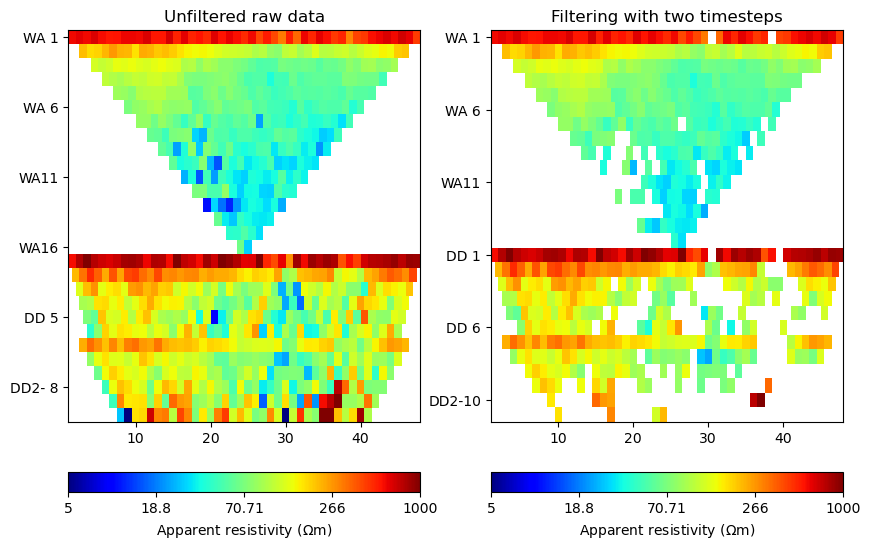

In [21]:
import pygimli as pg
import os 
from pygimli.physics import ert
import matplotlib.pyplot as plt
from datetime import datetime

from Hilfsfunktionen import processing 
from Hilfsfunktionen import adjust
from Hilfsfunktionen import read 
from Hilfsfunktionen import filter

# read data
dataset = 'two_timesteps'
wenner, dd = read(filename = dataset)

# Merge Wenner and DD
for wen in wenner:
    for dipol in dd:
        if wen[0] == dipol[0]:
            wen[1].add(dipol[1])
            
# Show unfiltered data
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axs = axs.flatten()  # Umwandeln ins eindimensionale Array
ert.show(wenner[0][1], wenner[0][1]['rhoa'], ax=axs[0], cMin=5, cMax=1000, cMap='jet')
axs[0].set_title('Unfiltered raw data')

# Processing and filtering
for data in wenner:
    processing(data[1],  max_err = 10, smallest_rhoa = 10, biggest_rhoa = 2000,
               err_abs = 0.01, err_rel = .1, max_err_est =100,  setError = False, sort_out_error = 10000 )
    filter(data[1], filter_value = 0.8,  setError = False, sort_out_error = 10000)
    
adjust(wenner) # same quadropoles for all time steps

# Remove values that double or halve relative to the subsequent time step
for nr, data in enumerate(wenner):
    if nr > 0:
        wenner[nr-1][1].remove(data[1]['rhoa']/wenner[nr-1][1]['rhoa']>1.7)
adjust(wenner) # same quadropoles for all time steps
for nr, data in enumerate(wenner):
    if nr > 0:
        wenner[nr-1][1].remove(data[1]['rhoa']/wenner[nr-1][1]['rhoa']<0.5)
adjust(wenner) # same quadropoles for all time steps

# Show filtered data
ert.show(wenner[0][1], wenner[0][1]['rhoa'], ax=axs[1], cMin=5, cMax=1000, cMap='jet')
axs[1].set_title('Filtering with two timesteps')

fig.savefig('./Fig10/Pseudosektionen_gefiltert.png', bbox_inches = 'tight', dpi=300)


# save filtered data 
for ordner_name, daten_objekt in wenner: 
    ordner_pfad = os.path.join("filtered_data", ordner_name) 
    os.makedirs(ordner_pfad, exist_ok=True)
    datei_pfad = os.path.join(ordner_pfad, "two_timesteps.ohm")
    daten_objekt.save(datei_pfad)
